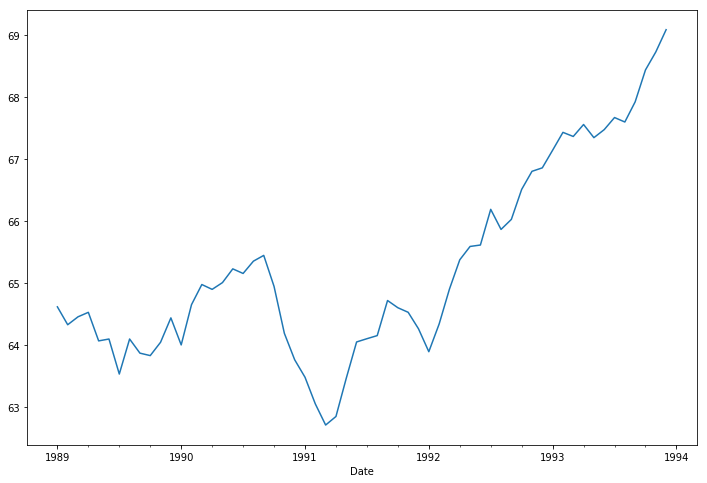

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools as it
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = (12, 8)
warnings.filterwarnings('ignore')
ds = pd.read_excel('testing.xlsx', index_col = 'Date')
first = ds.Value
second = ds.index
first.plot()

# Изображение скользящего среднего и стандартного отклонения

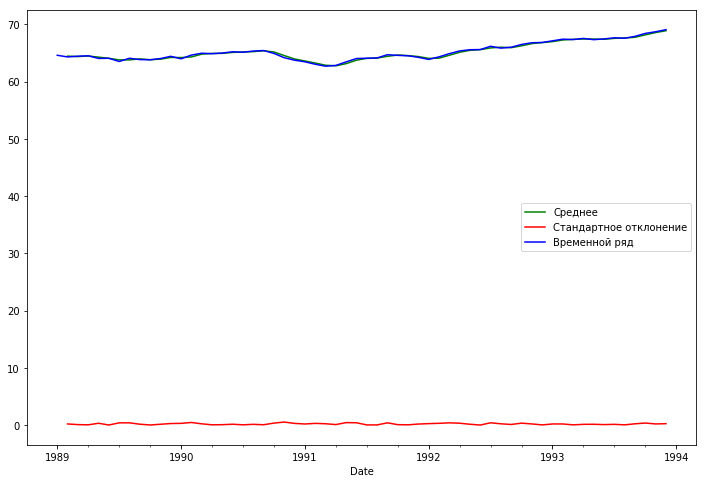

In [3]:
first.rolling(window = 2).mean().plot(color = 'g',
                                    legend = True, label = 'Среднее')
first.rolling(window = 2).std().plot(color = 'r',
                                   legend = True, label = 'Стандартное отклонение')
first.plot(color = 'b',legend = True, label = 'Временной ряд')
plt.show()

# Проверка ряда на стационарность с помощью теста Дики-Фуллера

In [4]:
#Тест Дики-Фуллера

x = sm.tsa.adfuller(first)
print('Тестовая статистика', x[0])
print('Приблизительная p-ценность', x[1])
print('Критические значения', x[4])
if x[0] > x[4]['5%']:
    print('Есть единичные корни, ряд не стационарен')
else:
    print('Единичных корней нет, ряд стационарен')


Тестовая статистика 0.45342782263595394
Приблизительная p-ценность 0.9833866795378372
Критические значения {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}
Есть единичные корни, ряд не стационарен


# Разложение временного ряда на тренд, сезональность, остаток

## Аддитивная модель

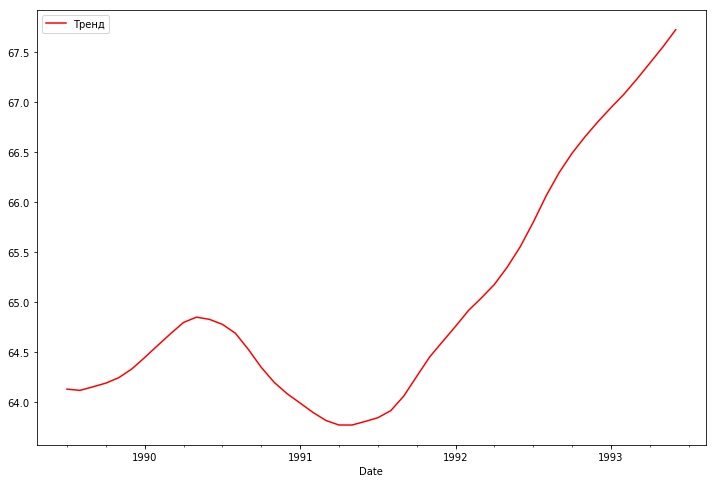

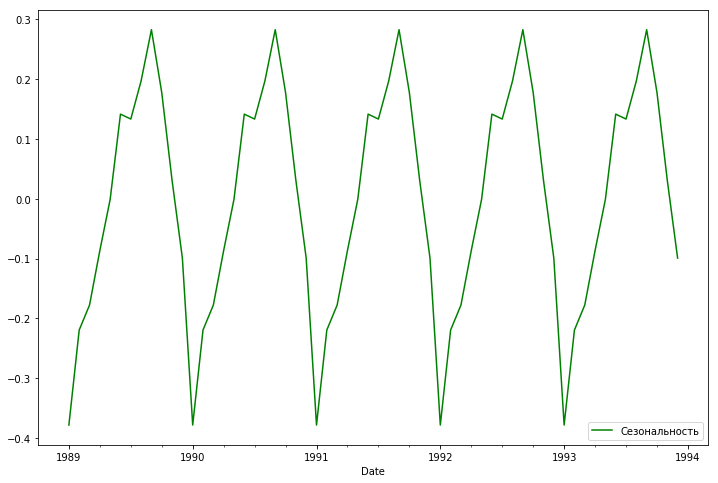

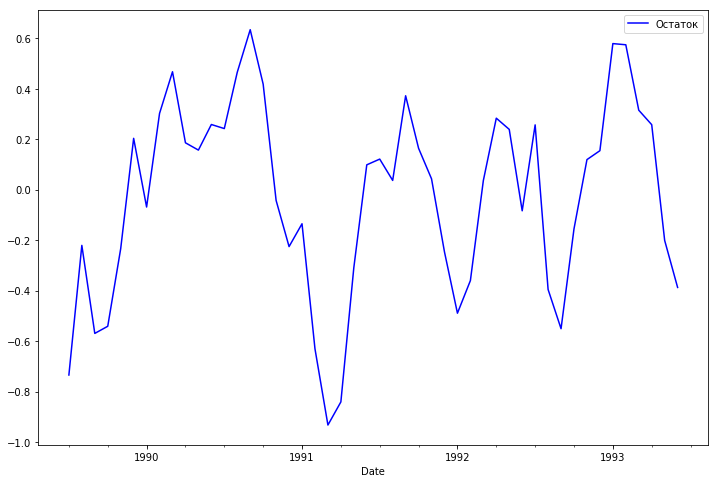

In [7]:
#Аддитивная модель

decompos = seasonal_decompose(DS.Value, model = "additive")
decompos.trend.plot(color = 'r', label = 'Тренд',
                    legend = True)
plt.show()
decompos.seasonal.plot(color = 'g', label = 'Сезональность',
                       legend = True)
plt.show()
decompos.resid.plot(color = 'b', label = 'Остаток',
                    legend = True)
plt.show()

## Проверка тренда, сезональности и остатка на стационарность при помощи теста Дики-Фуллера

In [8]:
#Проверка Тренда

decompos.trend.dropna(inplace = True)
test = sm.tsa.adfuller(decompos.trend)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('Eсть единичные корни, ряд не стационарен')
else:
    print('Eдиничных корней нет, ряд стационарен')


adf:  1.1269216882745567
p-value:  0.9954399639175244
Critical values:  {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}
Eсть единичные корни, ряд не стационарен


In [10]:
#Проверка сезональности

decompos.seasonal.dropna()
test = sm.tsa.adfuller(decompos.seasonal)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('Eсть единичные корни, ряд не стационарен')
else:
    print('Eдиничных корней нет, ряд стационарен')

adf:  -1486096705733366.0
p-value:  0.0
Critical values:  {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
Eдиничных корней нет, ряд стационарен


In [11]:
#Проверка остаточного

decompos.resid.dropna(inplace = True)
test = sm.tsa.adfuller(decompos.resid)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
                print('Eсть единичные корни, ряд не стационарен')
else:
                print('Eдиничных корней нет, ряд стационарен')

adf:  -3.238140202136583
p-value:  0.017880433585478455
Critical values:  {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
Eдиничных корней нет, ряд стационарен


## Мультипликативная модель 

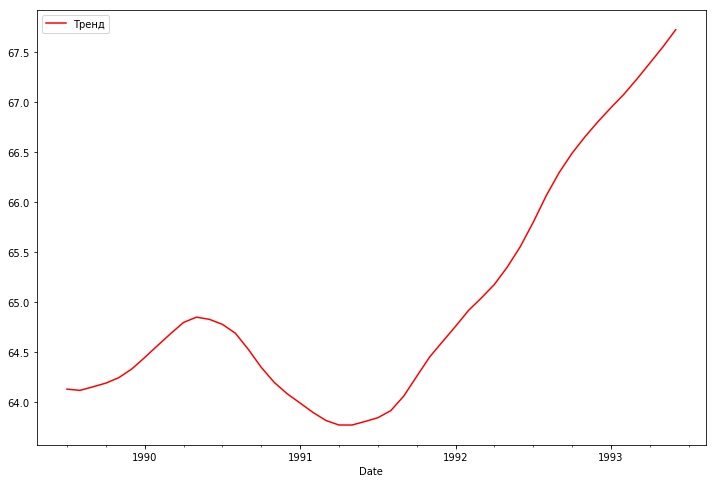

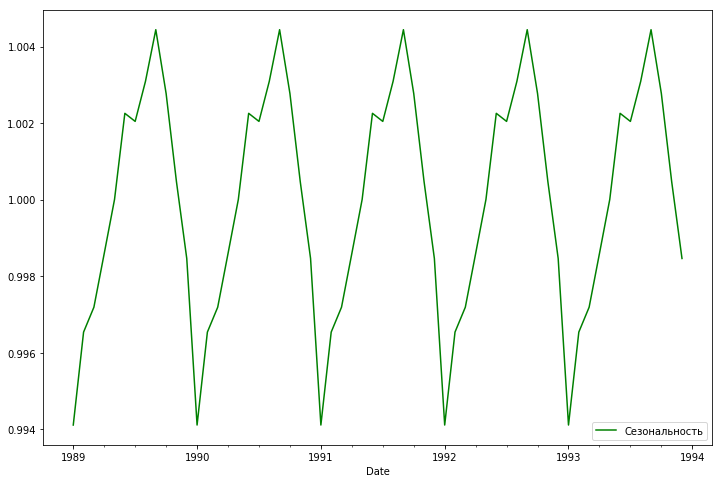

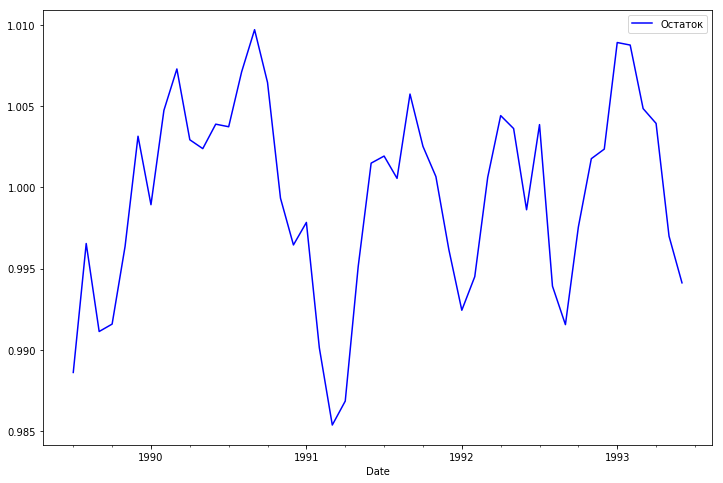

In [12]:
#Мультипликативная модель

decompos = seasonal_decompose(first, model = "multiplicate")
decompos.trend.plot(color = 'r', label = 'Тренд',
                    legend = True)
plt.show()
decompos.seasonal.plot(color = 'g', label = 'Сезональность',
                       legend = True)
plt.show()
decompos.resid.plot(color = 'b', label = 'Остаток',
                    legend = True)
plt.show()

## Проверка тренда, сезональности и остатка на стационарность при помощи теста Дики-Фуллера для мультипликативной модели

In [13]:
#Проверка Тренда

decompos.trend.dropna(inplace = True)
test = sm.tsa.adfuller(decompos.trend)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('Eсть единичные корни, ряд не стационарен')
else:
    print('Eдиничных корней нет, ряд стационарен')

adf:  1.1269216882745567
p-value:  0.9954399639175244
Critical values:  {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}
Eсть единичные корни, ряд не стационарен


In [14]:
#Проверка сезональности

decompos.seasonal.dropna()
test = sm.tsa.adfuller(decompos.seasonal)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('Eсть единичные корни, ряд не стационарен')
else:
    print('Eдиничных корней нет, ряд стационарен')

adf:  -16175941712395.963
p-value:  0.0
Critical values:  {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
Eдиничных корней нет, ряд стационарен


In [45]:
#Проверка остаточного

decompos.resid.dropna(inplace=True)
test = sm.tsa.adfuller(decompos.resid)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('Eсть единичные корни, ряд не стационарен')
else:
    print('Eдиничных корней нет, ряд стационарен')

adf:  -3.2366863296383652
p-value:  0.01795694592339656
Critical values:  {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
Eдиничных корней нет, ряд стационарен


# Определение порядка интегрируемости ряда при помощи теста Дики-Фуллера

In [15]:
#Определяем порядок интегрированности ряда

i = 1
Y = sm.tsa.adfuller(first)
if Y[0] > Y[4]['5%']:
        D = first.diff(periods = 1).dropna()
else:
        i = 0
k = 0
while i == 1:
        Y = sm.tsa.adfuller(D, autolag = 'AIC')
        if Y[0] <= Y[4]['5%']:
            i = 0
        D = D.diff(periods = 1).dropna()
        k = k + 1
if k:
    print("Ряд является интегрированным порядка ", k)

Ряд является интегрированным порядка  1


# Автокорелляция и частичная автокорелляция

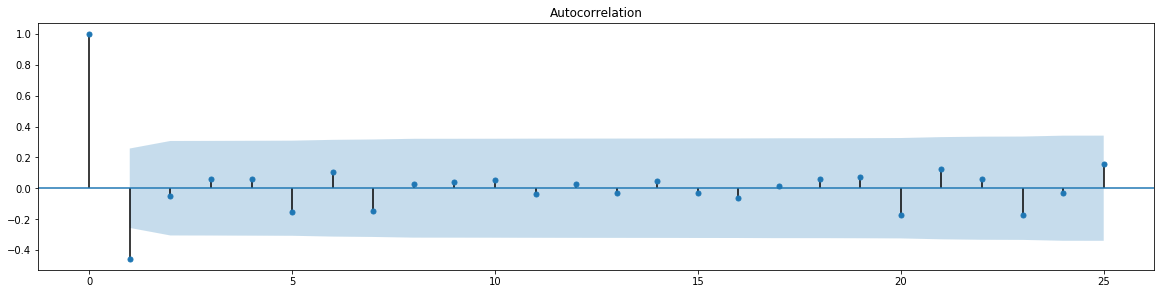

In [16]:
fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(2, 1, 1)
fig = sm.graphics.tsa.plot_acf(D, lags = 25, ax = ax1)

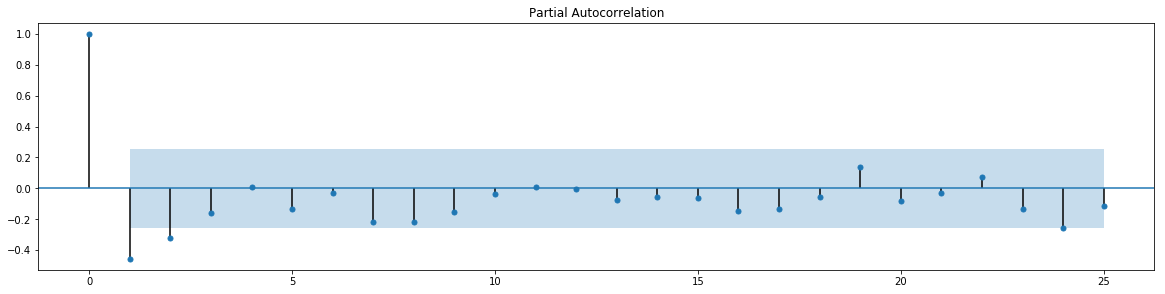

In [17]:
fig = plt.figure(figsize = (20, 10))
ax2 = fig.add_subplot(2, 1, 1)
fig = sm.graphics.tsa.plot_pacf(D, lags = 25, ax = ax2)

In [49]:
#По графикам определяем значения

In [19]:
#Посчитаем количество моделей на заданных критериях

ps = range(0,5)
qs = range(0,6)
parametrs=it.product(ps,qs)#,Ps,Qs)
parametrs_list=list(parametrs)
len(parametrs_list)

30

## Модель ARIMA

In [21]:
results = []
best_aic = float("inf")

for param in parametrs_list:
    try:
        model = sm.tsa.statespace.SARIMAX(first, order = (param[0], k, param[1])
                                        , trend = 'ct').fit()
    except:
        continue
    aic = model.aic
    if aic<best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param,model.aic])
result_table = pd.DataFrame(results)
result_table.columns = ['parametrs','aic']
print(result_table.sort_values(by = 'aic', ascending = [True]).head())

   parametrs        aic
5     (1, 0)  42.475792
0     (0, 1)  42.558041
11    (2, 0)  44.259385
6     (1, 1)  44.309055
1     (0, 2)  44.375303


In [52]:
print(best_model.summary())

                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                   60
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 -17.238
Date:                Fri, 07 Dec 2018   AIC                             42.476
Time:                        23:48:33   BIC                             50.853
Sample:                    01-01-1989   HQIC                            45.753
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0795      0.091     -0.875      0.382      -0.257       0.099
drift          0.0048      0.003      1.529      0.126      -0.001       0.011
ar.L1          0.1420      0.119      1.192      0.2

First test R2:  0.9259477490771396
First test AIC= 42.475792257408806
Second test R2:  0.9338470007817893
SEcond test AIC= 45.218627899518225


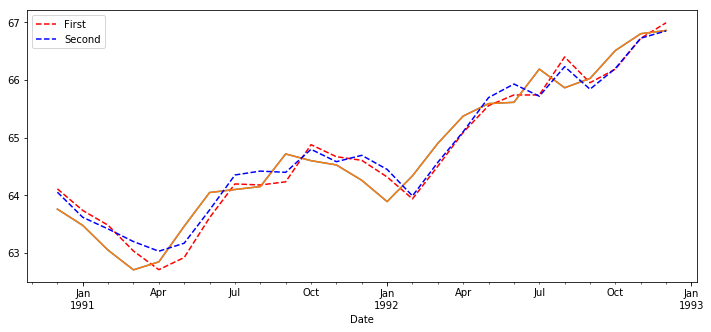

In [31]:
predsk = best_model.predict('1990-12-01','1992-12-01')
tst = first['1990-12-01':'1992-12-01']
r2 = r2_score(tst, predsk)

model1=sm.tsa.statespace.SARIMAX(first, order = (1, 1, 5),
                                 trend = 'ct').fit()
#print(model_ARIMA.summary())

predsk1 = model1.predict('1990-12-01','1992-12-01')
tst1 = first['1990-12-01':'1992-12-01']
r21 = r2_score(tst1, predsk1)

print("First test R2: ", r2)
print("First test AIC=", best_model.aic)
print("Second test R2: ", r21)
print("SEcond test AIC=", model1.aic)
tst.plot(figsize = (12, 5))
predsk.plot(figsize = (12, 5), style = 'r--',
            legend = True, label = 'First')
tst1.plot()
predsk1.plot(figsize = (12, 5), style = 'b--',
             legend = True, label = 'Second')
plt.show()